# C- Wind Turbine Induction Generator Design

## Project Specifications

In this project, a squirrel cage induction generator for the Northerl Energy's VIRA-250 wind turbine will be designed. The specifications are as follows:

Rated Power: 250 kW
Rated Wind Speed: 14 m/s
Rated Turbine Speed: 24.3 rpm
Gear Ratio: 31.2
Number of Poles: 8
Line to line voltage: 400 V
Frequency: 50 Hz
Rated Speed: 758 rpm
Gearbox: (Coupled from wind turbine blade)
Insulation Class: F

In [82]:
from math import sqrt,sin,cos,pi,tan,exp
Prated=250000; # rated power in W
Wrated=14; # rated wind speed in m/s
n=31.2; # gear ratio
m=3; # number of phases
p=8; # number of poles
pp=p/2; # pole pair of the m/c
V_ll=400; # line-to-line voltage
Vph=V_ll/sqrt(3); # phase voltage
fs=50; # line frequency
nrated=758; # rated speed in rpm
eff=0.9; # targeted efficiency 
pf=0.85; # targeted power factor
s=0.02; # targeted slip ratio

## Main Dimensions of Stator Core

The project will start finding stator and rotor dimensions. Firstly, we will calculate stator bore diameter.

In [8]:
Ke=0.98-0.005*pp; # eq. 15.1 from Boldea
Sgap=(Ke*Prated)/(eff*pf); # air-gap apparent power in VA
print('Airgap apparent power is',round(Sgap,2),'VA.')

Airgap apparent power is 313725.49 VA.


By using the figure below, I have accepted machine constant as 235 kJ/m3.

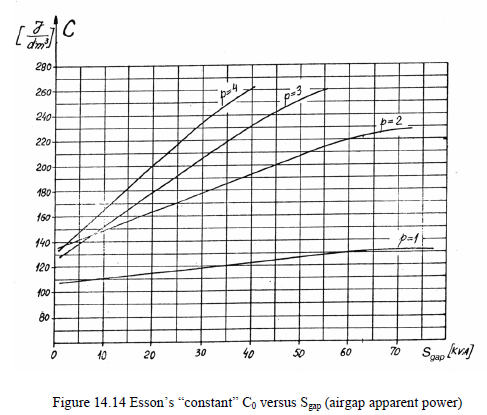

In [9]:
from IPython.display import Image
Image(filename='essons_constant.png', width=400, height=400)

In [10]:
C0=235000; # Esson's constant in J/m3 using 14.14
λ=2.5; # Stack aspect ratio for pole number of 8 from Table 15.1

We can now find stator bore diameter, stack length, pole pitch and defining number of stator slots per pole we can find slot pitch.

In [11]:
Dis=((2*(pp**2)*Sgap)/(pi*λ*fs*C0))**(1./3.); # stator bore diameter in m
L=(λ*pi*Dis)/(2*pp); # stack length in m
τ=(pi*Dis)/(2*pp); # pole pitch in m
q=4; # number of stator slots per pole (selecting high is beneficial)
τs=τ/(m*q); # slot pitch in m
print ('Stator bore diameter is',round(Dis,2), 'm.')
print ('Stack length is',round(L,2), 'm.')
print ('Pole pitch is',round(τ,2), 'm.')
print ('Slot pitch is',round(τs,3), 'm.')

Stator bore diameter is 0.48 m.
Stack length is 0.47 m.
Pole pitch is 0.19 m.
Slot pitch is 0.016 m.


By using Table 15.2 from Boldea, Kd is selected to be 0.73.

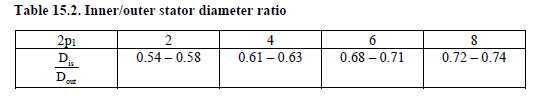

In [12]:
from IPython.display import Image
Image(filename='kd.png', width=400, height=400)

In [13]:
Kd=0.73;
Dout=Dis/Kd;
print ('Outer diameter is',round(Dout,2), 'm.')

Outer diameter is 0.65 m.


Air-gap is found from using equation 15.5. It is feasible to produce as seen.

In [14]:
g=(0.1+(0.012*(Prated**(1./3.))))/1000; # airgap in m
print('Airgap is',round(g,4),'m.')

Airgap is 0.0009 m.


## Stator Winding

Using 15.6, number of stator slots found and the winding structure will be identified.

In [15]:
Ns=2*pp*q*m; # number of stator slots
print ('Number of stator slots is',round(Ns,2), '.')

Number of stator slots is 96.0 .


To eliminate 5th harmonics, 7/9 two layer chorded coil is selected. Now, let's find electrical angle between emfs in neighboring slots.

In [16]:
αec=(2*pi*pp)/Ns; # angle between emfs in neigboring slots
yt=7/9;
print ('Elec. angle between emfs is',round(αec,2), 'rad')

Elec. angle between emfs is 0.26 rad


Now, we can find zone factor, chording factor and stator winding factor.

In [17]:
Kq1=(sin(q*αec/2))/(q*(sin(αec/2))); # zone factor
Ky1=sin((pi/2)*yt); # chording factor
Kw1=Ky1*Kq1; # stator winding factor
print ('Zone factor is',round(Kq1,2),'.')
print ('Chording factor is',round(Ky1,2),'.')
print ('Stator winding factor is',round(Kw1,2),'.')

Zone factor is 0.96 .
Chording factor is 0.94 .
Stator winding factor is 0.9 .


Airgap flux density is selected to be 0.8 according to eq. 15.11. Now, we will find airgap flux and so number of turns per phase.

In [18]:
Bg=0.8; # airgap flux density
αi=0.729;
Kf=1.085;
φ=αi*τ*L*Bg; # pole flux
W1=(Ke*Vph)/(4*Kf*Kw1*fs*φ); # number of turns per phase
print ('Number of turns per phase is',round(W1,2),'.')

Number of turns per phase is 22.16 .


In [19]:
a1=2; # number of current parallel path for this case
ns=a1*W1/(pp*q); # number of conductors per slot
print ('Number of conductors per slot is',round(ns,2),'.')

Number of conductors per slot is 2.77 .


If we assume a double layer winding for this machine, number of conductors should be even, thus we will set as ns=2 and number of turns per phase and airgap flux density will be arranged accordingly again.

In [20]:
ns=2;
W1_old=W1;
W1=ns*pp*q;
Bg=Bg*(W1_old/W1);
print ('Number of turns per phase is',round(W1,2),'.')
print ('Airgap flux density is',round(Bg,2),'.')

Number of turns per phase is 32.0 .
Airgap flux density is 0.55 .


Now, we will find the wire diameter by starting finding rated current. 

In [21]:
I1n=Prated/(eff*pf*sqrt(3)*V_ll);
Jcos=6; # current density in A/mm2
Aco=I1n/(Jcos*a1);
dco=sqrt(4*Aco/(pi));
print ('Wire gauge diameter is',round(dco,2),'mm.')

Wire gauge diameter is 7.07 mm.


Since dco is bigger than 1.3mm, we need to get conductors parallel. By selecting 36 parallel strands, we can minimize the diameter of the wire. But, we need to change a1!!!!!!!!!

In [22]:
ap=36; # number of parallel elementary conductors
dco=sqrt(4*Aco/(pi*ap));
print ('Wire gauge diameter is',round(dco,2),'mm.')

Wire gauge diameter is 1.18 mm.


## Stator Slot Sizing

We will start by selecting fill factor 0.42 and find useful slot area firstly.

In [23]:
Kfill=0.42;
Asu=(pi*dco*ap*ns)/(4*0.42);
print ('Useful slot area is',round(Asu,2),'mm2')

Useful slot area is 158.75 mm2


The recommended slot shapes can be seen below. We have chosen trapezoidal shape for this design. Now, we will calculate all widths seen in below.

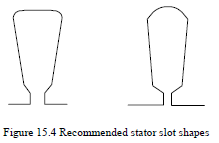

In [24]:
from IPython.display import Image
Image(filename='slot_shapes.png', width=200, height=100)

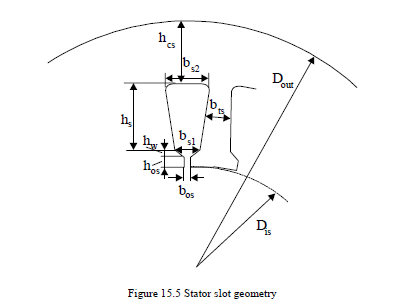

In [25]:
from IPython.display import Image
Image(filename='slot_geometry.png', width=400, height=400)

From past experience (stated in Boldea), bos, hos and wedge hedight hw is selected below. The other dimensions will be calculated accordingly by assuming all the airgap flux passes through the stator teeth.

In [26]:
bos=2.5e-3; # bos in m
hos=0.75e-3; # hos in m
hw=2e-3; # hw in m
Kfe=0.96; # for 0.5mm thick lamination
Bts=1.7; # tooth flux density in T
bts=(Bg*τs)/(Bts*Kfe); # tooth width in m
print ('Tooth width is',round(bts,4),'m.')

Tooth width is 0.0053 m.


Tooth width is higher than the technological limit of 3.5mm. Now, we will find slot lower width bs1.

In [27]:
bs1=(pi*((Dis+2*hos+2*hw)/Ns))-bts;
print ('Slot lower width is',round(bs1,4),'m.')

Slot lower width is 0.0105 m.


In [28]:
bs2=sqrt(4*(Asu/1e6)*tan(pi/Ns)+bs1**2);
hs=(2*(Asu/1e6))/(bs1+bs2);
print ('Slot upper width is',round(bs2,4),'m.')
print ('Slot useful height is',round(hs,4),'m.')

Slot upper width is 0.0114 m.
Slot useful height is 0.0145 m.


Whether we should keep on design prodecure, we have to find Fmts & Fmtr values. Accepting Kst=0.4 and Hts=4800 for Bts=1.7 from table 15.4, we will start to calculate.

In [29]:
Kst=0.4;
Hts=4800;
Fmg=1.2*g*Bg/(4*pi*1e-7); # airgap mmf in Aturns
Fmts=Hts*(hs+hos+hw); # stator tooth mmf in Aturns
Fmtr=Kst*Fmg-Fmts; # rotor tooth mmf in Aturns
print ('MMF of airgap is',round(Fmg,2),'Aturns.')
print ('MMF of stator tooth is',round(Fmts,2),'Aturns.')
print ('MMF of rotor tooth is',round(Fmtr,2),'Aturns.')

MMF of airgap is 452.77 Aturns.
MMF of stator tooth is 82.64 Aturns.
MMF of rotor tooth is 98.47 Aturns.


Since Fmtr is slightly larger than Fmts, we can continue on design. Now, stator back iron height will be found and Bcs will be calculated.

In [30]:
hcs=(Dout-(Dis+2*(hos+hw+hs)))/2; # stator back iron height in m
Bcs=φ/(2*L*hcs);
print ('Stator back iron height is',round(hcs,2),'m.')
print ('Back core flux density is',round(Bcs,2),'T.')

Stator back iron height is 0.07 m.
Back core flux density is 0.77 T.


Since back core flux density is not within the range 1.4T to 1.7T, we will decrease outer diameter.

In [31]:
Dout=0.59;
hcs=(Dout-(Dis+2*(hos+hw+hs)))/2; # stator back iron height in m
Bcs=φ/(2*L*hcs);
print ('Outer diameter is',round(Dout,2),'m after now')
print ('Stator back iron height is',round(hcs,2),'m.')
print ('Back core flux density is',round(Bcs,2),'T.')

Outer diameter is 0.59 m after now
Stator back iron height is 0.04 m.
Back core flux density is 1.4 T.


## Rotor Slots

According to "Design and Testing of Electrical Machines" book, stator/rotor slot number is selected to be 96/72. This number set also satisfies the "combinations to avoid" rules declared in the class, too.

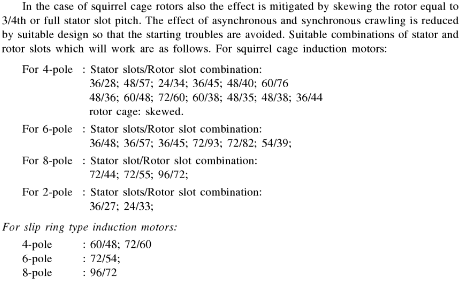

In [32]:
from IPython.display import Image
Image(filename='rotor_stator_combination.png', width=400, height=400)

In [33]:
Nr=72; # number of rotor slots

By using the rotor shape depicted in below - the one shown in "c"-, we will start to find dimensions of thee rotor slots.

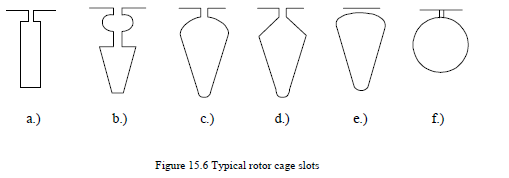

In [34]:
from IPython.display import Image
Image(filename='rotor_slot_shape.png', width=400, height=400)

In [38]:
KI=0.8*pf+0.2;
Ib=KI*2*m*W1*Kw1*I1n/Nr; # rotor bar current in A
print ('Rotor bar current is',round(Ib,2),'A.')
Jb=3.42e6; # for high efficiency rotor bar current density selected as 3.42
Ab=Ib/Jb; # rotor slot area in m2
Ier=Ib/(2*sin(pi*pp/Nr)); # end ring current in A
print ('Slot area of the rotor is',round(Ab,5),'m2.')
print ('End ring current is',round(Ier,2),'A.')

Rotor bar current is 996.11 A.
Slot area of the rotor is 0.00029 m2.
End ring current is 2868.19 A.


Current density is selected as 0.75Jb for heat transfer.

In [40]:
Jer=0.75*Jb; # end ring current density in A/m2
Aer=Ier/Jer; # end ring cross section in m2
print ('Cross section of end ring is',round(Aer,5),'m2.')

Cross section of end ring is 0.00112 m2.


Detailed dimensions will be found according to upper values and the figure depicted below.

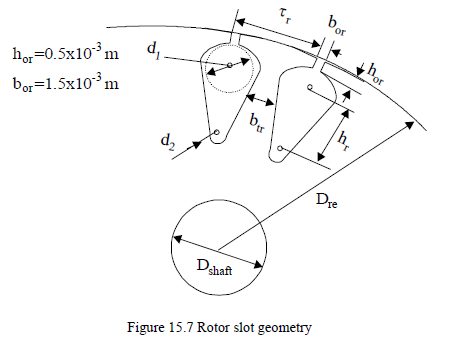

In [41]:
from IPython.display import Image
Image(filename='rotor_slot_geometry.png', width=400, height=400)

In [45]:
hor=0.5e-3; 
bor=1.5e-3;
τr=pi*(Dis-2*g)/Nr; # rotor slot pitch in m
Dre=Dis-2*g;
print ('Rotor slot pitch is',round(τr,5),'m.')

Rotor slot pitch is 0.02075 m.


In [59]:
Btr=1.65; # rotor tooth flux density in T
btr=Bg*τr/(Kfe*Btr); # tooth width in m
print ('Tooth width is',round(btr,5),'m.')

Tooth width is 0.00726 m.


In [60]:
d1=(pi*(Dre-2*hor)-Nr*btr)/(pi+Nr); # diameter of the rotor tooth in m
print(round(d1,4),'m.')

0.0129 m.


Using eq. 15.43 & 15.44, we have calculated d2 & hr.

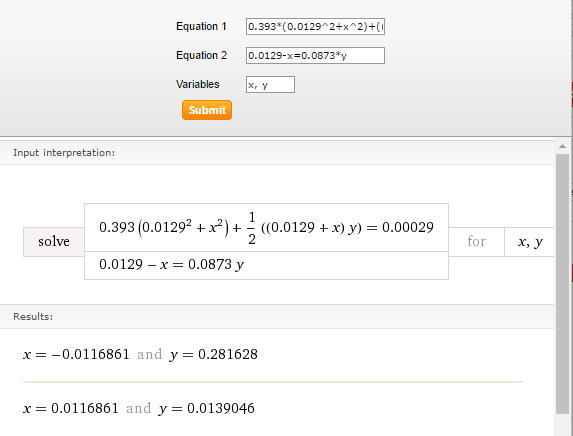

In [64]:
from IPython.display import Image
Image(filename='d2_hr2.png', width=400, height=400)

In [61]:
d2=0.0116; # d2 in m
hr=0.0139; # hr in m

To verify the design, we will calculate Fmtr.

In [63]:
Htr=3460; # from table 15.4 with Btr=1.65T
Vmtr=Htr*(hr+hor+(d1+d2)/2);
print(Vmtr)

92.19251091179534


Since Fmtr & Vmtr are cose to each other, we can continue to the design. By finding rotor back core height, we can find the maximum diameter of the shaft (Dshaft).

In [65]:
Bcr=1.65; # rotor back core flux density in T
hcr=φ/(2*L*Bcr); # rotor back core height in m
print ('Rotor back core height is',round(hcr,5),'m.')

Rotor back core height is 0.03313 m.


In [68]:
Dshaft_max=Dis-2*g-2*(hor+((d1+d2)/2)+hr+hcr); # maximum diameter of the shaft in m
print ('Maximum diameter of the shaft is',round(Dshaft_max,3),'m.')

Maximum diameter of the shaft is 0.356 m.


In [70]:
Ten=Prated/(2*pi*(fs/pp)*(1-s)); # rated torque in Nm
print ('Rated torque is',round(Ten,2),'Nm.')

Rated torque is 3248.06 Nm.


Now, let's find the end ring dimensions by using the figure below.

In [73]:
Der=Dre-3.5e-3; # end ring diameter in m
b=1.1*(hr+hor+((d1+d2)/2)); # end ring height in m
a=Aer/b; # end ring width in m
print ('End ring diameter is',round(Der,3),'m.')
print ('End ring height is',round(b,3),'m.')
print ('End ring width is',round(a,3),'m.')

End ring diameter is 0.472 m.
End ring height is 0.029 m.
End ring width is 0.038 m.


## Magnetization Current

To verify design, we can find Carter's coefficient. At the start of the design, we took it as 1.2.

In [80]:
γ1=(bos**2)/(5*g+bos);
γ2=(bor**2)/(5*g+bor);
Kc1=τs/(τs-γ1);
Kc2=τr/(τr-γ2);
Kc=Kc1*Kc2;
print('System Kc is',round(Kc,3),'.')

System Kc is 1.083 .


As seen, this value is very close to the initial select. Now, we can calculate magnetization current and saturation factor.

In [84]:
Ccs=0.88*exp(-0.4*(Bcs**2));
Ccr=0.88*exp(-0.4*(Bcr**2));
Hcs=760; # stator back core flux intensity in A/m
Hcr=3460; # rotor back core flux intensity in A/m
Fmcs=Ccs*(pi*(Dout-hcs)*Hcs*Bcs/(2*pp));
Fmcr=Ccr*(pi*(Dshaft_max-hcr)*Hcr*Bcr/(2*pp));
print('Stator back core mmf is',round(Fmcs,2),'Aturns.')
print('Rotor back core mmf is',round(Fmcr,2),'Aturns.')

Stator back core mmf is 92.55 Aturns.
Rotor back core mmf is 214.45 Aturns.


In [90]:
Flm=2*((Kc*g*Bg)/(4*pi*1e-7)+Fmts+Vmtr+Fmcs+Fmcr);
print('The magnetization mmf is',round(Flm,2),'Aturns.')
Ks=Flm/(2*Fmg)-1;
print('Total saturation factor is',round(Ks,2),'.')
Iu=(pi*pp*Flm/2)/(3*sqrt(2)*W1*Kw1);
print('Magnetization current is',round(Iu,2),'A.')
iu=Iu/I1n;
print('Relative value of Iu is',round(iu,2),'.')

The magnetization mmf is 1780.96 Aturns.
Total saturation factor is 0.97 .
Magnetization current is 91.59 A.
Relative value of Iu is 0.19 .


## Resistances & Inductances

We will calculate all the values written below. We will start with stator phase resistance. Firstly, we need to know end connection length and the find stator phase resistance.

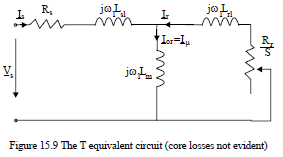

In [2]:
from IPython.display import Image
Image(filename='res_ind.png', width=300, height=300)